In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt 
import pandas as pd

import parameters as params

In [2]:
base_path = 'E:/Child Skin Disease(part)/Total_Dataset'
# base_path = os.path.join(base_path, )

In [3]:
train_list = [0, 1, 2, 3, 4, 5, 6, 9]
test_list = [7, 8]

In [4]:
total_list = []
train_classes_list = {}
test_classes_list = {}
# head_cl

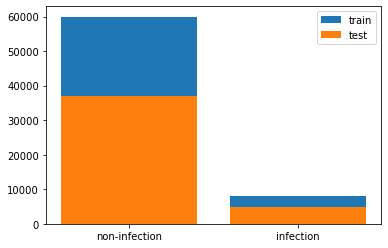

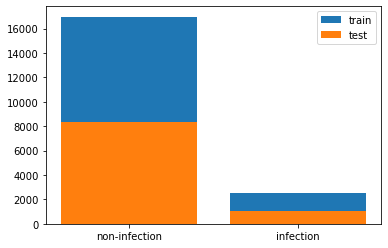

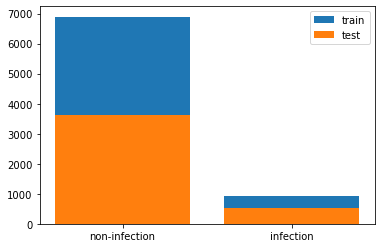

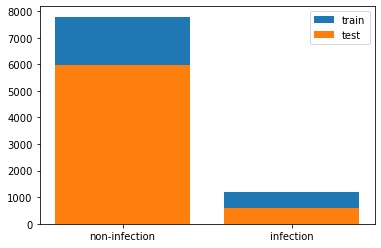

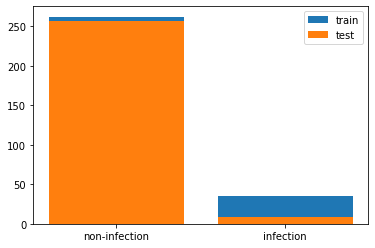

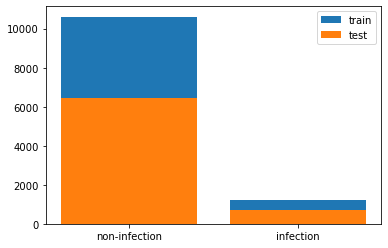

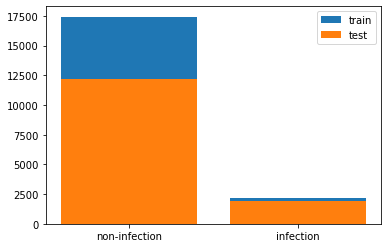

c:\ProgramData\Miniconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [28]:
writer = pd.ExcelWriter('C:/Users/user/Desktop/models/child_skin_classification_infection/plots.xlsx', engine = 'xlsxwriter')
parts = ['total', 'head', 'body', 'upper', 'ass', 'bottom', 'etc']

for part in parts: 
    
    # total_list = []
    train_classes_list = {'non-infection' : 0, 'infection': 0}
    test_classes_list = {'non-infection' : 0, 'infection': 0}
    
    for i in train_list:
        
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if part == 'total':
                    imgs = len(glob(os.path.join(base_path, f'H{i}', cls, f'*/*.jpg')))
                else:
                    imgs = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                
                if cls.lower().replace(' ', '') in params.name_dict1:
                    cls = params.name_dict1[cls.lower().replace(' ', '')]
                    
                if cls.lower().replace(' ', '') in params.infection_list:
                    train_classes_list['infection'] += imgs
                else:
                    train_classes_list['non-infection'] += imgs
                    
    for i in test_list:
        
        
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if part == 'total':
                    imgs = len(glob(os.path.join(base_path, f'H{i}', cls, f'*/*.jpg')))
                else:
                    imgs = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                
                if cls.lower().replace(' ', '') in params.name_dict1:
                    cls = params.name_dict1[cls.lower().replace(' ', '')]
                
                # if cls not in total_list:
                #     total_list.append(cls)

                if cls.lower().replace(' ', '') in params.infection_list:
                    test_classes_list['infection'] += imgs
                else:
                    test_classes_list['non-infection'] += imgs

    total_df = pd.DataFrame(columns=['Disease', 'Train Count', 'Test Count'])

    # for i, t in enumerate(total_list):
    total_df.loc[0, 'Disease'] = 'non-infection' 
    total_df.loc[0, 'Train Count'] = train_classes_list['non-infection']
    total_df.loc[0, 'Test Count'] = test_classes_list['non-infection']
    
    total_df.loc[1, 'Disease'] = 'infection' 
    total_df.loc[1, 'Train Count'] = train_classes_list['infection']
    total_df.loc[1, 'Test Count'] = test_classes_list['infection']
        
        
    # plt.figure(figsize=(20, 60))
    plt.bar(['non-infection', 'infection'], [train_classes_list[i] for i in ['non-infection', 'infection']], label='train')
    plt.bar(['non-infection', 'infection'], [test_classes_list[i] for i in ['non-infection', 'infection']], label='test')
    plt.legend()
    plt.show() 
        
    total_df.to_excel(writer, sheet_name=part)
    
writer.save()
writer.close()